<a href="https://colab.research.google.com/github/MidLeona/my_code/blob/main/CNN%20%EC%88%B2%20%EC%82%AC%EB%A7%89%20%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8%20with%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

In [2]:
# 케글 환경 준비, 데이터셋 다운
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d akhiljethwa/forest-vs-desert

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/akhiljethwa/forest-vs-desert
License(s): CC-BY-NC-SA-4.0
 66% 5.00M/7.54M [00:00<00:00, 41.1MB/s]
100% 7.54M/7.54M [00:00<00:00, 58.6MB/s]


In [3]:
#파일 목록 확인
!ls

# zip 파일 압축 해제
!unzip forest-vs-desert.zip

!ls

forest-vs-desert.zip  kaggle.json  sample_data
Archive:  forest-vs-desert.zip
  inflating: Data/Desert/desert.0.jpg  
  inflating: Data/Desert/desert.1.jpg  
  inflating: Data/Desert/desert.10.jpg  
  inflating: Data/Desert/desert.100.jpg  
  inflating: Data/Desert/desert.101.jpg  
  inflating: Data/Desert/desert.102.jpg  
  inflating: Data/Desert/desert.103.jpg  
  inflating: Data/Desert/desert.104.jpg  
  inflating: Data/Desert/desert.105.jpg  
  inflating: Data/Desert/desert.106.jpg  
  inflating: Data/Desert/desert.107.jpg  
  inflating: Data/Desert/desert.108.jpg  
  inflating: Data/Desert/desert.109.jpg  
  inflating: Data/Desert/desert.11.jpg  
  inflating: Data/Desert/desert.110.jpg  
  inflating: Data/Desert/desert.111.jpg  
  inflating: Data/Desert/desert.112.jpg  
  inflating: Data/Desert/desert.113.jpg  
  inflating: Data/Desert/desert.114.jpg  
  inflating: Data/Desert/desert.115.jpg  
  inflating: Data/Desert/desert.116.jpg  
  inflating: Data/Desert/desert.117.jpg  
  in

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2,)
training_set = train_datagen.flow_from_directory('/content/Data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training')
validation_set = train_datagen.flow_from_directory('/content/Data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='validation')

Found 642 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [6]:
#신경망 설정
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [7]:
# 파라미터 설정
epochs = 10
learning_rate = 1e-4

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
history = cnn.fit(x=training_set, validation_data=validation_set, epochs=epochs)

Epoch 1/10
21/21 [==============================] - 7s 90ms/step - loss: 0.5722 - accuracy: 0.7056 - val_loss: 0.4510 - val_accuracy: 0.9563
Epoch 2/10
21/21 [==============================] - 2s 76ms/step - loss: 0.3219 - accuracy: 0.9595 - val_loss: 0.2199 - val_accuracy: 0.9625
Epoch 3/10
21/21 [==============================] - 2s 73ms/step - loss: 0.1558 - accuracy: 0.9704 - val_loss: 0.1179 - val_accuracy: 0.9750
Epoch 4/10
21/21 [==============================] - 2s 76ms/step - loss: 0.0915 - accuracy: 0.9751 - val_loss: 0.0834 - val_accuracy: 0.9812
Epoch 5/10
21/21 [==============================] - 3s 147ms/step - loss: 0.0718 - accuracy: 0.9829 - val_loss: 0.0722 - val_accuracy: 0.9812
Epoch 6/10
21/21 [==============================] - 2s 74ms/step - loss: 0.0659 - accuracy: 0.9782 - val_loss: 0.0997 - val_accuracy: 0.9563
Epoch 7/10
21/21 [==============================] - 2s 75ms/step - loss: 0.0581 - accuracy: 0.9766 - val_loss: 0.0753 - val_accuracy: 0.9688
Epoch 8/10
2

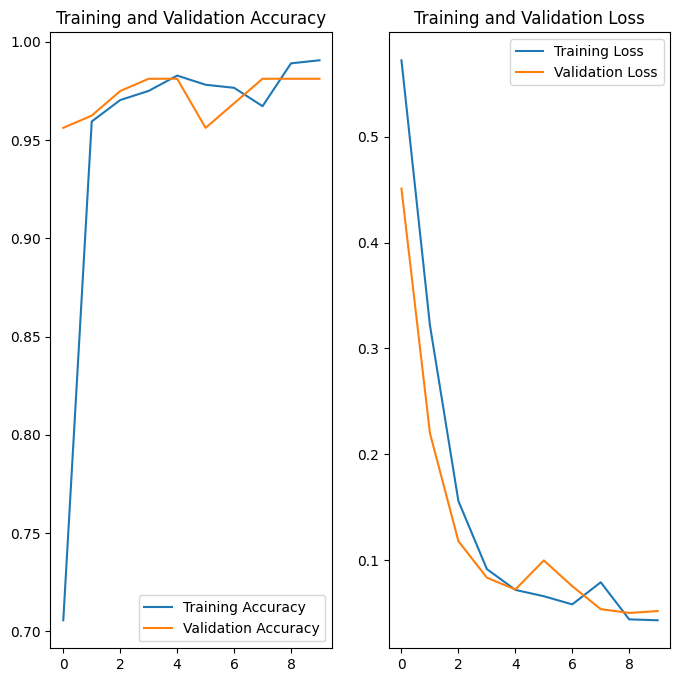

In [8]:
# 시각화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()